<a href="https://colab.research.google.com/github/spesivan/collab_notes/blob/main/lstm_deneme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = pd.read_csv("./LSTM-Multivariate_pollution.csv")

In [24]:
df.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [25]:
df.isnull().sum()

date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [26]:
df.describe()

,pollution,dew,temp,press,wnd_spd,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


<ipython-input-27-5e4b9e19f342>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["wnd_spd"])


<Axes: xlabel='wnd_spd', ylabel='Density'>

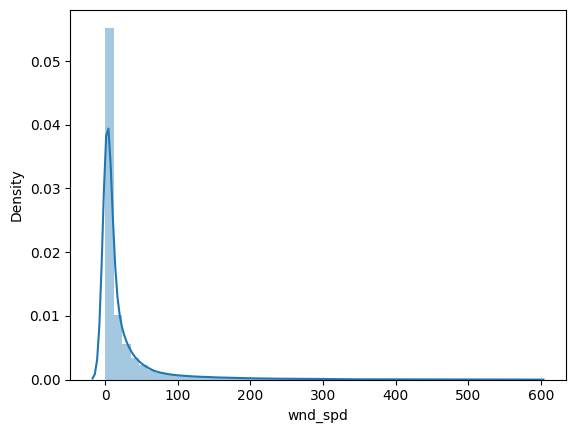

In [27]:
sbn.distplot(df["wnd_spd"])

In [28]:
df.corr()["wnd_spd"].sort_values()

<ipython-input-28-d40b369a4390>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["wnd_spd"].sort_values()


dew         -0.296720
pollution   -0.234362
temp        -0.154902
rain        -0.010137
snow         0.021876
press        0.185380
wnd_spd      1.000000
Name: wnd_spd, dtype: float64

In [29]:
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [30]:
df_new = df
df_new.index = pd.to_datetime(df_new['date'],format = '%Y-%m-%d %H:%M:%S')
df_new = df_new.drop("date", axis = 1)
df_new = df_new.drop("wnd_dir", axis = 1) # no corr

In [31]:
df_new.head()

,pollution,dew,temp,press,wnd_spd,snow,rain
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


In [32]:
df_new.corr()["wnd_spd"].sort_values()

dew         -0.296720
pollution   -0.234362
temp        -0.154902
rain        -0.010137
snow         0.021876
press        0.185380
wnd_spd      1.000000
Name: wnd_spd, dtype: float64

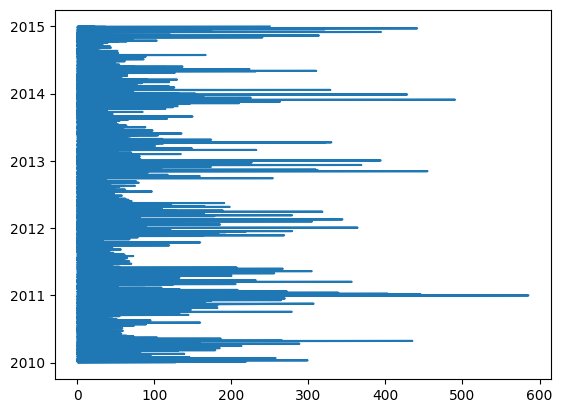

In [33]:
plt.plot(df_new["wnd_spd"],df_new.index)

In [34]:
# ------------------------- from sklearn.model_selection import train_test_split
# ------------------------- from sklearn.preprocessing import MinMaxScaler

In [36]:
def df_to_X_y(df_new, window_size=5):
  df_as_np = df_new.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

<Axes: xlabel='date'>

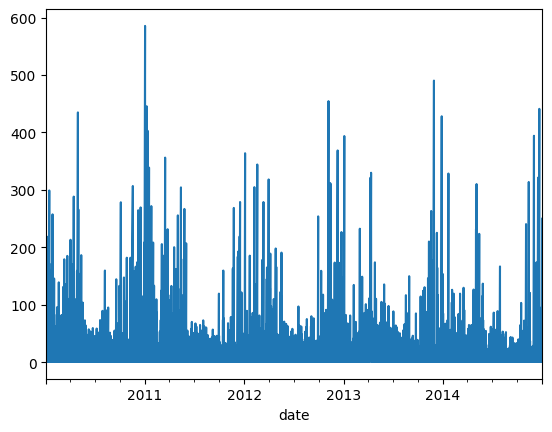

In [37]:
temp = df['wnd_spd']
temp.plot()

In [38]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((43795, 5, 1), (43795,))

In [52]:
a = round(len(df_new) * 0.7)
b = round(len(df_new) * 0.8)

X_train1, y_train1 = X1[:a], y1[:a]
X_val1, y_val1 = X1[a:b], y1[a:b]
X_test1, y_test1 = X1[b:], y1[b:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((30660, 5, 1), (30660,), (4380, 5, 1), (4380,), (8755, 5, 1), (8755,))

In [62]:
# !pip install tensorflow

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , LSTM

In [57]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))   ####   X_train1.shape is (5,1)
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [64]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
959/959 [==============================] - 13s 10ms/step - loss: 3042.0774 - root_mean_squared_error: 55.1550 - val_loss: 2983.4727 - val_root_mean_squared_error: 54.6212
Epoch 2/10
959/959 [==============================] - 8s 9ms/step - loss: 2608.6538 - root_mean_squared_error: 51.0750 - val_loss: 2703.9077 - val_root_mean_squared_error: 51.9991
Epoch 3/10
959/959 [==============================] - 8s 9ms/step - loss: 2292.8347 - root_mean_squared_error: 47.8836 - val_loss: 2440.7800 - val_root_mean_squared_error: 49.4043
Epoch 4/10
959/959 [==============================] - 11s 12ms/step - loss: 2007.6437 - root_mean_squared_error: 44.8067 - val_loss: 2192.8274 - val_root_mean_squared_error: 46.8276
Epoch 5/10
959/959 [==============================] - 13s 14ms/step - loss: 1754.4142 - root_mean_squared_error: 41.8857 - val_loss: 1965.8329 - val_root_mean_squared_error: 44.3377
Epoch 6/10
959/959 [==============================] - 8s 8ms/step - loss: 1529.1238 - root_mea

In [65]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [66]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

959/959 [==============================] - 5s 3ms/step


,Train Predictions,Actuals
0,6.891932,7.14
1,7.510118,8.93
2,9.259631,10.72
3,10.765012,12.51
4,12.273088,14.30
...,...,...
30655,49.456779,55.43
30656,58.734840,62.58
30657,67.674034,69.73
30658,76.315910,75.54


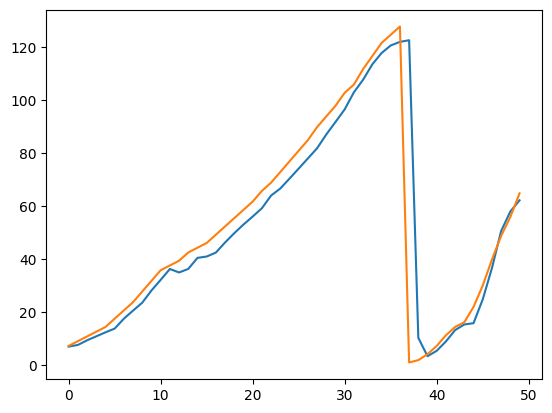

In [72]:
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actuals'][:50])

In [73]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

137/137 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,80.714706,88.50
1,86.882950,5.81
2,7.188600,9.83
3,11.818622,15.64
4,17.255711,21.45
...,...,...
4375,123.155846,143.48
4376,123.261261,147.50
4377,123.300491,151.52
4378,123.318169,153.31


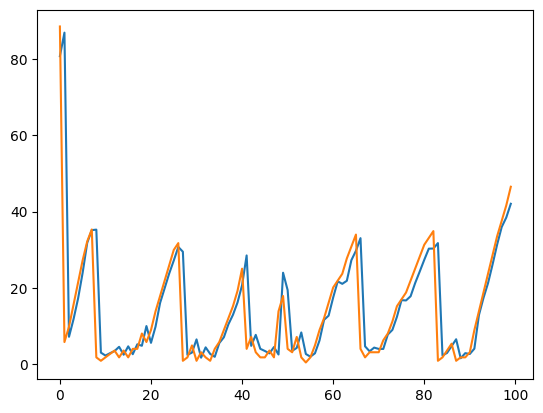

In [74]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [75]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

274/274 [==============================] - 1s 3ms/step


,Test Predictions,Actuals
0,10.365588,4.02
1,5.576940,8.94
2,11.359363,16.09
3,20.961811,21.90
4,24.868563,26.82
...,...,...
8750,123.356567,231.97
8751,123.356812,237.78
8752,123.357010,242.70
8753,123.357170,246.72


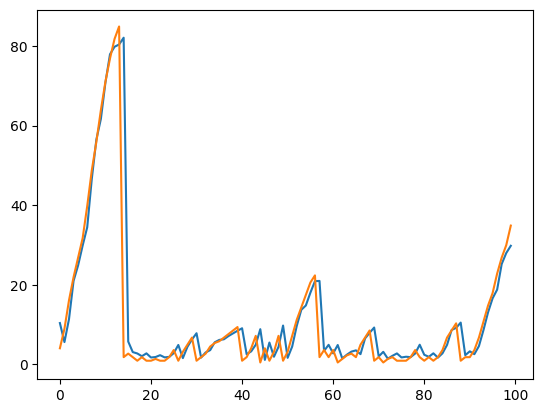

In [76]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])